![](./Matplotlib_logo.png)

# Creating plots with Matplotlib 

After having gotten a basic hold on NumPy arrays, it is time to dive into the fascinating world of data visualization. We are going to use Matplotlib - the most popular and mature plotting library for Python.

> **Please note**: I am using the notebook interface to write this, since it is great for making
> demos of all the feature. However, I recommend that you try the code below in the terminal or QtConsole 
> interface, as these have some features that this doesn't. 
> For example, the plots will show up in an interactive window that allow, panning, zooming, etc., unlike this 
> interface that produces static raster images of the plots.

First, the imports. Remember to **not** run the `%matplotlib inline` part, and remember to add `plt.show()` when running these examples in the terminal/QtConsole.

In [2]:
import scipy as sp
import matplotlib.pyplot as plt
# The following line should only be used in the Notebook:
% matplotlib inline

The most important input to all functions in Matplotlib is the data arrays. Matplotlib does **not** by default offer a way to plot a symbolic expression like "$y = sin^2(x^2) \sqrt{x}$". For this, see the SymPy package which we shall not look at now.

If one wants to plot the above expression in Matplotlib, the way to do it is to define an array of index ("$x$") values, and define another array containing the function values ("$y$") like this:

In [3]:
x = sp.linspace(0, 10, 1000) # 1000 elements equally spaced between 0 and 10 
y = sp.sin(x**2)**2 * sp.sqrt(x)

The most basic `pyplot` function is simply `plot()`, and the simplest possible input to give it is a sequence of numbers. This sequence will be interpreted as the $y$ values, and it will automatically generate a vector of integers of the same length as the $x$ values:

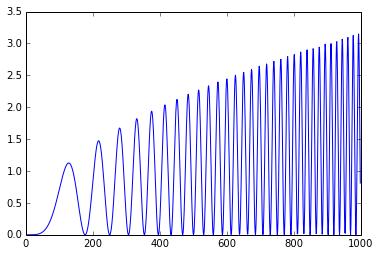

In [4]:
plt.plot(y)
# plt.show()  # remember to run this when not in the Notebook!

This means it is really easy to take a quick-'n'-dirty look at a dataset just to see what it looks like. 

If you instead pass it **two** sequences, they will be interpreted as $(x, y)$ values. If you write several plot commands before `plt.show()`, they will all be put into the same plot (unless you create *subplots*, more about that later). You can control color, linewidth, linestyle, marker style, transparency and many other things, you can type:

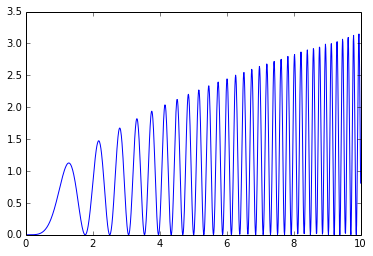

In [5]:
plt.plot(x, y)
# plt.show()

In [6]:
plt.plot?

in the IPython console to see the documentation (it is very helpful if you take your time to read it!). Now let us try to play a bit:

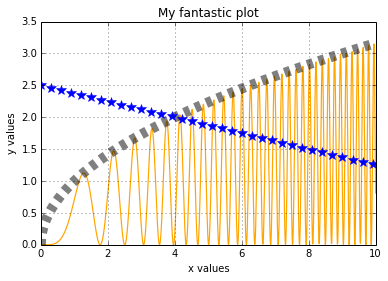

In [6]:
plt.plot(x, y, color='orange', linewidth=1.2)
plt.plot(x, sp.sqrt(x), color='black', linestyle='--', 
         linewidth=10., alpha=.5)
plt.plot(x[::30], -x[::30] / 8. + 2.5, 'b*', mec='b', ms=10)
plt.grid()
plt.title('My fantastic plot')
plt.xlabel('x values')
plt.ylabel('y values')
# plt.show()

## Working with data files

We now know how to easily generate data and plot them. But often, we already have our data from an instrument or a measurement or something, most often in the form of a text file. As an example here, I am using a quasar spectrum with absorption lines from two galaxies on the its line of sight to Earth. The data can be found in the file `SpecVis.ascii`. 

To read the data into a NumPy `Array` object, we use the function `sp.loadtxt()`:

In [21]:
data_array = sp.loadtxt('SpecVis.ascii')
print(data_array.shape)
data_array

(20431, 3)


array([[  5.30175000e+03,  -1.61844949e+04,   5.74864778e+06],
       [  5.30200000e+03,  -1.97178349e+03,   3.30944071e+06],
       [  5.30225000e+03,   1.74242625e+03,   2.71321435e+06],
       ..., 
       [  1.04087500e+04,   1.31605483e+02,   1.95303308e+02],
       [  1.04090000e+04,   3.99332199e+02,   5.82233267e+02],
       [  1.04092500e+04,   1.43806093e+02,   5.82274721e+02]])

The data contains three columns: Wavelength, data and standard deviation. For convenience, we will assigneach of these columns to its own array and try to plot it to inspect our data:

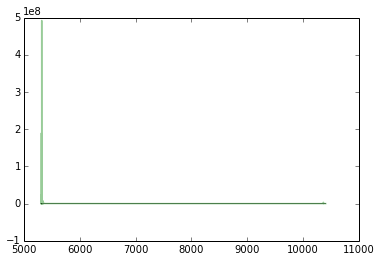

In [22]:
wave = data_array[:, 0]
data = data_array[:, 1]
errs = data_array[:, 2]
plt.plot(wave, data, 'k-', lw=.5)
plt.plot(wave, errs, 'g-', lw=1.5, alpha=.4)
# plt.show()

At this point, I recommend you play a bit around with this plot in the interactive Matplotlib window. Try to zoom, pan, and all the other functions in the toolbar.

However, since this is a rather large dataset ($\sim 20000$ bins) and the inline Notebook plots don't have interactive capabilities, I will 'manually' zoom in on an interesting region here, using the `axis()` function:

(5500, 10000, 0, 200)

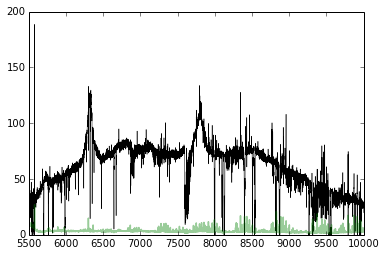

In [23]:
plt.plot(wave, data, 'k-', lw=.5)
plt.plot(wave, errs, 'g-', lw=1.5, alpha=.4)
plt.axis((5500, 10000, 0, 200))
# plt.show()

## Legend & text

Often, we want to have a key to the plot describing what each element represents.
There are, as always, several ways to do this, but the simplest is to pass a `label` keyword to each call to `plot()`, and then call the `legend()` function afterward.

Note that text inside pairs of \$ -signs is automatically interpreted as $\LaTeX$ code, which means it is really easy to write arbitrary equations, symbols etc. in Matplotlib plots.

Matplotlib understands much standard $\LaTeX$ code, but not some things like e.g. `\frac{}{}`. When it gets too hairy, it is possible to actually make $\LaTeX$ do the text rendering, but we are not going to do that now.

With the `figtext()` and `annotate()` functions combined with the $\LaTeX$ capabilities, it is quite simple to write arbitrary text anywhere you want in the plot. Annotate also supports all sorts of fancy arrows, but I'm not gonna go into that here, look it up yourself if you're feeling adventurous.

For now, let us try to show off with a bunch of fancy features:

In [25]:
plt.annotate?

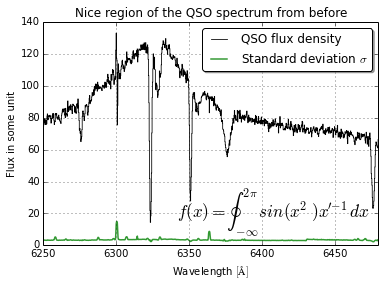

In [26]:
plt.plot(wave, data, 'k-', lw=.8, drawstyle='steps-mid', label='QSO flux density')
plt.plot(wave, errs, 'g-', lw=1.5, alpha=.8, label='Standard deviation $\sigma$')

plt.axis((6250, 6480, 0, 140))
plt.legend(loc='best', shadow=True, fancybox=True) 

plt.xlabel('Wavelength $[\AA]$')
plt.ylabel('Flux in some unit')
plt.title('Nice region of the QSO spectrum from before')

# The following formula doesn't make sense:
plt.annotate("$f(x) = \oint_{-\infty}^{2 \pi} sin(x^2) x'^{-1} dx$", 
    (.4, .12), xycoords='axes fraction', fontsize='xx-large') 

plt.grid()

## Multiple subplots in a figure

Sometimes we want to have two graps sitting next to each other in each their coordinate system. Accomplishing this can - Surprise! - happen in several different ways. If you are happy with your figures having the same height and the same width, the easiest way is the `subplot()` command. This takes as input three numbers $(i, j, k)$ denoting that this call creates the $k$'th subplot on an equal-spaced $i \times j$ grid. For example:

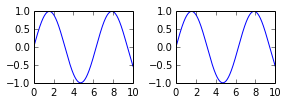

In [27]:
plt.subplot(3, 3, 1)
plt.plot(x, sp.sin(x))
plt.subplot(3, 3, 2)
plt.plot(x, sp.sin(x))   # ...etc.
plt.tight_layout()

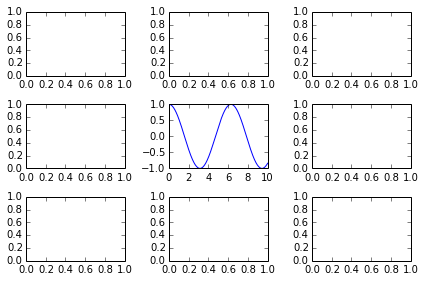

In [31]:
fig, axes = plt.subplots(3, 3)
ax5 = axes[1, 1]
ax5.plot(x, sp.cos(x))
plt.tight_layout()

...This is more than my patience can bear to do, so I'll let a loop do it for me.

Try to remove the `plt.tight_layout()` function below and see what happens:

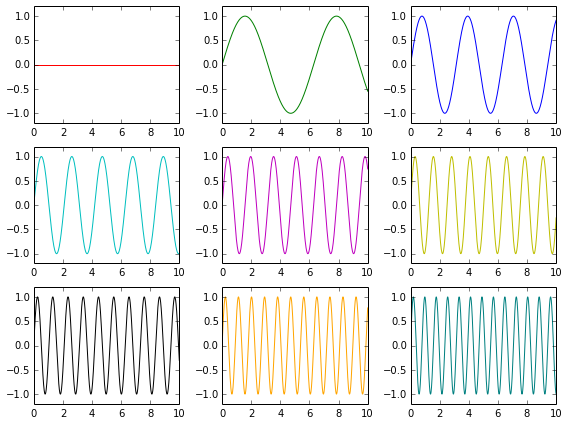

In [28]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'teal']

plt.figure()
plt.gcf().set_size_inches(8, 6)
for j in range(9):
    plt.subplot(3, 3, j+1)
    plt.plot(x, sp.sin(j*x), color=colors[j])
    plt.axis((0, 10, -1.2, 1.2))

plt.tight_layout()

You can 'cheat' `subplot()` into letting you create certain kinds of different sized plots like this:

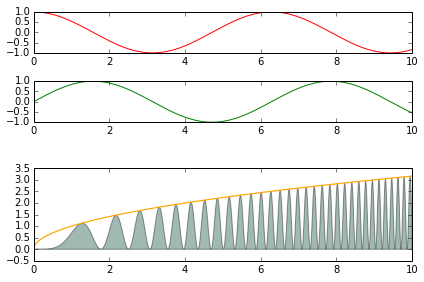

In [33]:
plt.subplot(4, 1, 1)
plt.plot(x, sp.cos(x), color='r')
plt.subplot(4, 1, 2)
plt.plot(x, sp.sin(x), color='g')
plt.subplot(2, 1, 2)                    # See what I did there?
plt.fill_between(x, y, color='#135343', edgecolor='k', alpha=.4)
plt.plot(x, sp.sqrt(x), color='orange', lw=1.2)
plt.tight_layout()

For anything more advanced than this, the package `matplotlib.gridspec` can be used.

## 2D arrays/datasets.

For twodimensional datasets, we have already seen that `plt.imshow()` is a good solution, but it is not the only one. Imshow is designed to show images (hence the name) and can take a single 2D array as input (in which case it will color code it according to our choice of colormap to create a pseudo-color image), or it can take three 2D arrays that will then be interpreted as the values of Red, Green and Blue, to create a true-color image.

But imshow is not the only, and not always the best, option for 2D data. Imshow will always keep an *aspect ratio* (that is, the scale ratio between the $x$ and $y$ axes) of 1, meaning that all pixels are square. That is what one wants for images, but not necessarily for all data types. Our other favorite function will be plt.`pcolormesh()`, which changes the AR freely, unless told not to.Another nice thing about pcolormesh is that it is easier to set coordinates for the two axes.

Besides, pcolormesh also lets you easily set arbitrary coordinates on your axes. Imshow will simply just show pixel numbers on the $(x, y)$ axes, but sometimes you would like to have other coordinates like e.g. $(RA, DEC)$ or $(\lambda, \square")$, or whatever is appropriate for your dataset.

***Example***:

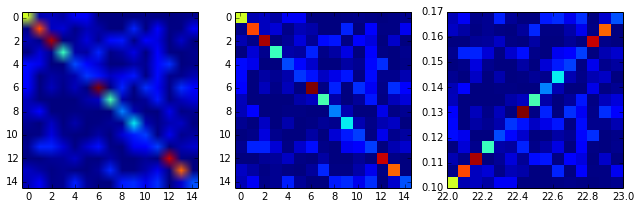

In [34]:
aa = (sp.random.random((15, 15)) + sp.eye(15))**3
my_xcoords = sp.linspace(22, 23, 16)    # 15 squares, 16 edges
my_ycoords = sp.linspace(.1, .17, 16)   # 15 squares, 16 edges 

#print my_xcoords
# my_ycoords = my_xcoords**2
plt.figure()
plt.gcf().set_size_inches(9, 3)
plt.subplot(131)
plt.imshow(aa)
plt.subplot(132)
plt.imshow(aa, interpolation='nearest')
plt.subplot(133)
plt.pcolormesh(my_xcoords, my_ycoords, aa)
plt.axis([my_xcoords.min(), my_xcoords.max(), my_ycoords.min(), my_ycoords.max()])
asp_rat = my_xcoords.ptp() / my_ycoords.ptp()  # ptp() = max - min
plt.gca().set_aspect(asp_rat)    # gca() = Get Current Axes
plt.tight_layout()


**Notice** how pcolormesh is flipped up/down compared to imshow? That is because imshow wants to represent the array as it is printed, with the 0'th row being the top one. Pcolormesh, on the other hand, uses a normal coordinate system which has its origin in the bottom. For imshow this can be changed by setting `origin='lower'` in the function call, for pclormesh you must reorder the array if you want to flip it.

## 3D plots

Matplotlib has support for basic 3D plot types - surface/mesh plots, 3D histograms, etc.

Consult the [examples gallery](http://matplotlib.org/gallery.html#mplot3d) to learn more!



## Colors

Matplotlib knows about any ways of defining colors. For the six seven base colors red, green, blue, cyan, magenta, yellow, white and black, a single letter('r', 'g', 'b', 'c', 'm', 'y', 'w', 'k') is enough to specify the color as above. Matplotlib understands the most common HTML/SVG colors which can be looked up online. Matplotlib also understands HTML color codes in `#F3F3F3` style, as well as RGB and RGBA tuples. So, really, there is no limit to the variety of colors one can define.

For pseudocolor plots, there is a bunch of different color scales to chose from depending on taste and purpose. Try reading `plt.colormaps?` for further information.

***Example:*** Setting the colormap, then redoing the last figure.

In [35]:
plt.colormaps?

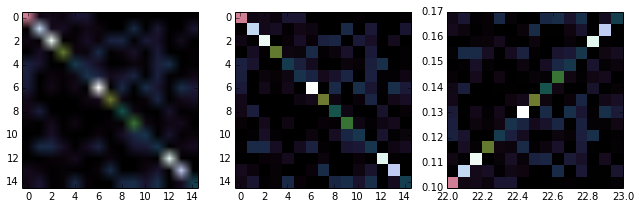

In [38]:
plt.set_cmap('cubehelix')  # '_r' means 'reversed'
plt.figure()
plt.gcf().set_size_inches(9, 3)
plt.subplot(131)
plt.imshow(aa)
plt.subplot(132)
plt.imshow(aa, interpolation='nearest')
plt.subplot(133)
plt.pcolormesh(my_xcoords, my_ycoords, aa)
asp_rat = my_xcoords.ptp() / my_ycoords.ptp()  # ptp() = max - min
plt.axis([my_xcoords.min(), my_xcoords.max(), my_ycoords.min(), my_ycoords.max()])
plt.gca().set_aspect(asp_rat)    # gca() = Get Current Axes
plt.tight_layout()

## Learn more

The best way to learn more is in fact to read the Matplotlib project's own documentation. Read the docstring of each function (`plot?` etc. etc.).

Next, a great place to learn more is the [Matplotlib examples gallery](http://http://matplotlib.org/gallery.html). 

There is a bunch of interesting IPython notebooks in [this github page](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks), especially interesting is [this one](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) which shows a different approach to using Matplotlib than I have showed here.

...and first and foremost, Google is your friend!